# Hierarchical clustering

In [1]:
import pandas as pd
file = "Smart_City_index_headers.csv"
data = pd.read_csv( file)

data.head()
data.shape

(102, 11)

## Scale the dataframe

In [2]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Columns that you want to scale
columns_to_scale = [
    'Smart_Mobility', 'Smart_Environment', 'Smart_Government', 
    'Smart_Economy', 'Smart_People', 'Smart_Living', 'SmartCity_Index', 
    'SmartCity_Index_relative_Edmonton'
]

# Apply the scaler to the dataset
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


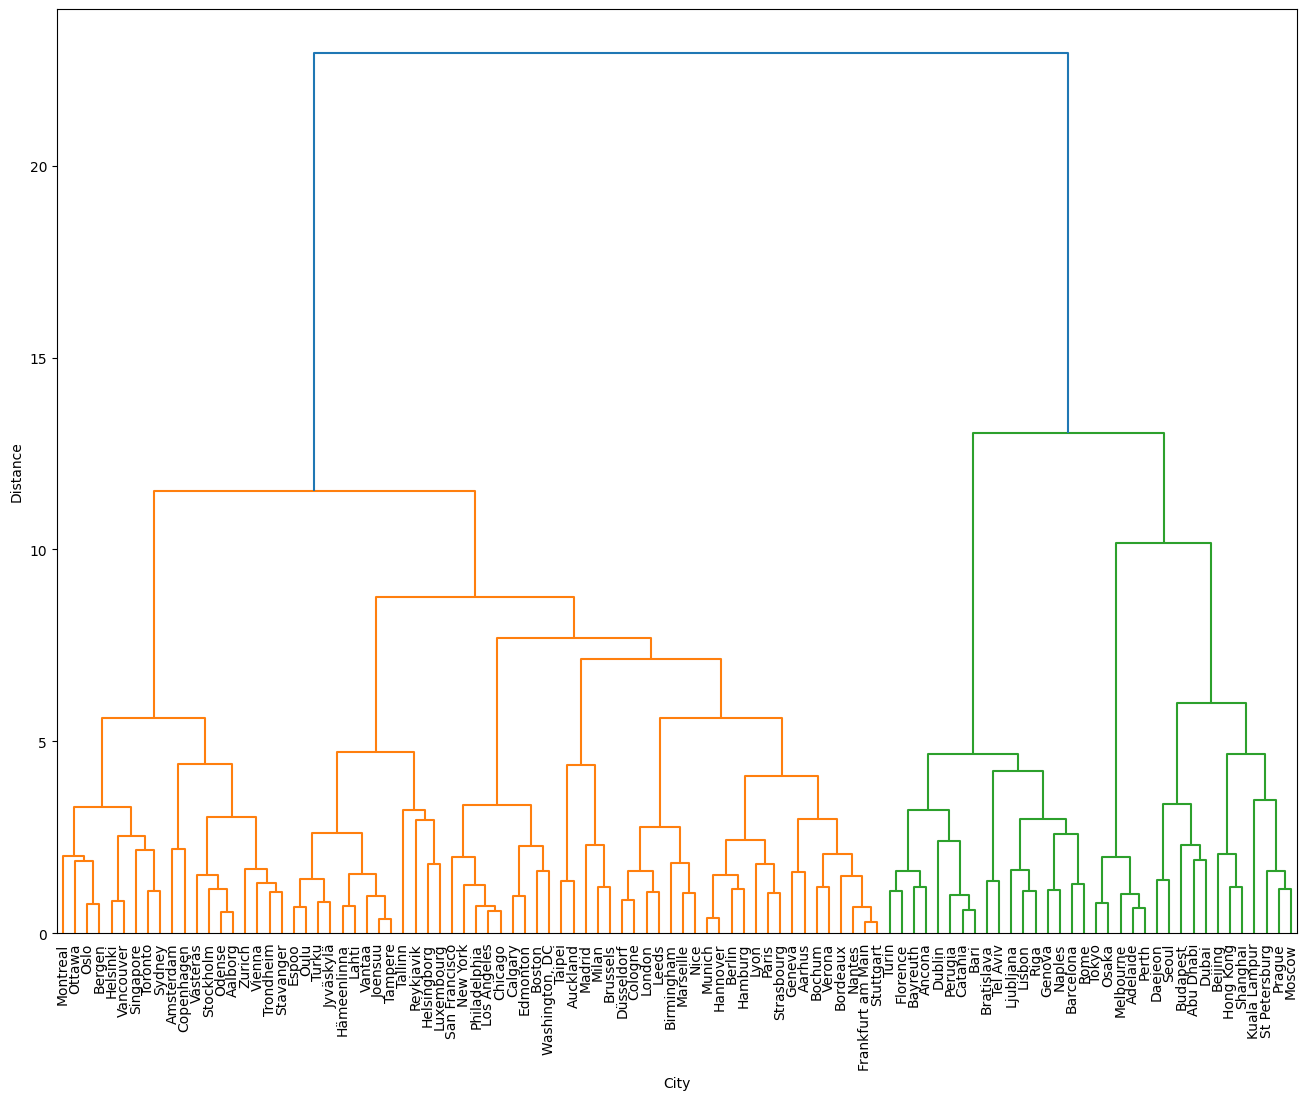

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'data' and 'columns_to_check' are defined
columns_to_check = [
    'Smart_Mobility', 'Smart_Environment', 'Smart_Government',
    'Smart_Economy', 'Smart_People', 'Smart_Living', 'SmartCity_Index',
    'SmartCity_Index_relative_Edmonton'
]

# Perform hierarchical/agglomerative clustering
Z = linkage(data[columns_to_check].values, method='ward')

# Plot the dendrogram
plt.figure(figsize=(16, 12))
dendrogram(Z, labels=data['City'].values.tolist(), leaf_rotation=90, leaf_font_size=10)
#plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('City')
plt.ylabel('Distance')
plt.savefig('dendrogram.pdf', dpi=1200)  # dpi=1200 for high resolution

# Model evaluation

In [4]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming 'data' contains the features and the 'Cluster' column is created after cutting the dendrogram
# For example, 'data['Cluster']' could be generated by cutting the dendrogram at a certain distance threshold

# Example: Assigning clusters from hierarchical clustering (cutting the dendrogram)
from scipy.cluster.hierarchy import fcluster

# You can adjust 't' (the threshold) and 'criterion' for cutting the dendrogram
data['Cluster'] = fcluster(Z, t=5, criterion='maxclust')

# Silhouette Score
sil_score = silhouette_score(data[columns_to_check], data['Cluster'])
print(f'Silhouette Score: {sil_score}')

# Davies-Bouldin Index
db_index = davies_bouldin_score(data[columns_to_check], data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(data[columns_to_check], data['Cluster'])
print(f'Calinski-Harabasz Index: {ch_index}')


Silhouette Score: 0.22209186115636936
Davies-Bouldin Index: 1.252301103907336
Calinski-Harabasz Index: 32.23539020505817


In [5]:
from scipy.cluster.hierarchy import fcluster

# Assuming Z is the linkage matrix obtained from the linkage function
# Set a threshold for cutting the dendrogram
# 't' is the threshold, and 'maxclust' specifies the maximum number of clusters

clusters = fcluster(Z, t=5, criterion='maxclust')

# Print the number of clusters
num_clusters = len(set(clusters))
print(f"Number of clusters: {num_clusters}")

Number of clusters: 5


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the dataset
file = "Smart_City_index_headers.csv"
data = pd.read_csv(file)

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = [
    'Smart_Mobility', 'Smart_Environment', 'Smart_Government', 
    'Smart_Economy', 'Smart_People', 'Smart_Living', 'SmartCity_Index', 
    'SmartCity_Index_relative_Edmonton'
]
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Perform hierarchical clustering
Z = linkage(data[columns_to_scale].values, method='ward')

# Create clusters (e.g., cut the dendrogram to form 5 clusters)
max_clusters = 5  # Define how many clusters you want
clusters = fcluster(Z, max_clusters, criterion='maxclust')

# Add the cluster labels to the dataframe
data['Cluster'] = clusters

# Print cities for each cluster
for cluster_num in np.unique(clusters):
    print(f"Cities in Cluster {cluster_num}:")
    print(data.loc[data['Cluster'] == cluster_num, 'City'].tolist())
    print()


Cities in Cluster 1:
['Oslo', 'Bergen', 'Amsterdam', 'Copenhagen', 'Stockholm', 'Montreal', 'Vienna', 'Odense', 'Singapore', 'Zurich', 'Trondheim', 'Västerås', 'Aalborg', 'Ottawa', 'Stavanger', 'Helsinki', 'Vancouver', 'Toronto', 'Sydney']

Cities in Cluster 2:
['Boston', 'Washington, DC', 'Los Angeles', 'Berlin', 'New York', 'Chicago', 'Taipei', 'Düsseldorf', 'Reykjavik', 'Lyon', 'Helsingborg', 'Munich', 'Philadelphia', 'Hamburg', 'Geneva', 'Luxembourg', 'Aarhus', 'Turku', 'Espoo', 'Paris', 'Hannover', 'Strasbourg', 'Joensuu', 'Frankfurt am Main', 'San Francisco', 'Oulu', 'Cologne', 'Bochum', 'Stuttgart', 'Hämeenlinna', 'London', 'Tampere', 'Jyväskylä', 'Vantaa', 'Auckland', 'Bordeaux', 'Milan', 'Madrid', 'Nantes', 'Brussels', 'Marseille', 'Leeds', 'Lahti', 'Verona', 'Nice', 'Tallinn', 'Birmingham', 'Calgary', 'Edmonton']

Cities in Cluster 3:
['Dublin', 'Catania', 'Bayreuth', 'Turin', 'Florence', 'Bari', 'Bratislava', 'Ljubljana', 'Perugia', 'Tel Aviv', 'Barcelona', 'Ancona', 'Lisbon